# WEEK 2 Ungraded Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>

METRICS:<br>
Mean Squared Error : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
Mean Absolute Error : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Accuracy Score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html<br>

####  IMPORTING THE DATA

In [2]:
# Import the file AS 'data'
# Start code
data = pd.read_csv("cars_data.csv")

# End code

In [3]:
# VIEWING THE DATA ONCE ( Use .head() )
# Start code
data.head()
# End code

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [4]:
data.shape

(2153, 20)

In [5]:
data.dtypes

price                  int64
year                   int64
mileage              float64
AGE_IN_YEARS           int64
chevrolet              int64
dodge                  int64
gmc                    int64
jeep                   int64
nissan                 int64
salvage insurance      int64
black                  int64
blue                   int64
gray                   int64
no_color               int64
silver                 int64
white                  int64
Goa                    int64
MP                     int64
Maharashtra            int64
UP                     int64
dtype: object

In [6]:
data.info()
#no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              2153 non-null   int64  
 1   year               2153 non-null   int64  
 2   mileage            2153 non-null   float64
 3   AGE_IN_YEARS       2153 non-null   int64  
 4   chevrolet          2153 non-null   int64  
 5   dodge              2153 non-null   int64  
 6   gmc                2153 non-null   int64  
 7   jeep               2153 non-null   int64  
 8   nissan             2153 non-null   int64  
 9   salvage insurance  2153 non-null   int64  
 10  black              2153 non-null   int64  
 11  blue               2153 non-null   int64  
 12  gray               2153 non-null   int64  
 13  no_color           2153 non-null   int64  
 14  silver             2153 non-null   int64  
 15  white              2153 non-null   int64  
 16  Goa                2153 

In [7]:
data.describe()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
count,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.00000,2153.000000
mean,19298.254529,2017.070135,48829.217836,2.432420,0.122620,0.180678,0.018579,0.010218,0.138412,0.044124,0.222945,0.061310,0.165815,0.026010,0.130516,0.312123,0.191825,0.210404,0.19647,0.212726
std,11904.200099,2.859018,47495.898243,1.102215,0.328076,0.384841,0.135063,0.100591,0.345412,0.205419,0.416318,0.239953,0.372001,0.159203,0.336948,0.463467,0.393828,0.407690,0.39742,0.409331
min,25.000000,1973.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,10800.000000,2016.000000,21034.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,17300.000000,2018.000000,34922.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,26000.000000,2019.000000,59798.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,74000.000000,2020.000000,999999.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


We will use the `train_test_split` function to split the data into TRAIN and TEST <br>
Here we import it from SKLEARN

In [8]:
from sklearn.model_selection import train_test_split

If you don't know about Feature transformation, it is highly recommended to go through this blog before proceding<br>
<a href="https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45">Top 3 Methods for Handling Skewed data</a>
#### TLDR; We wish that all our features have a normal distribution

Let us look at the Distribution of `Price` column 

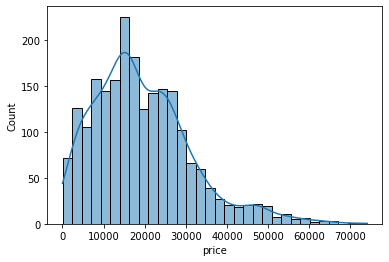

In [9]:
sns.histplot(x=data['price'], kde=True);

In [11]:
data['price'].skew()

0.9370149624905348

It is RIGHT-SKEWED <br>
We will either use log transform or sqrt transform

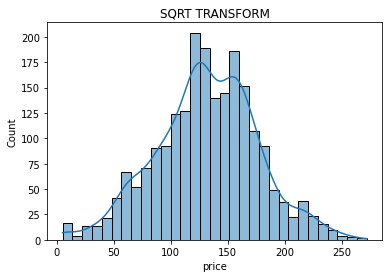

-2.7563348651437454


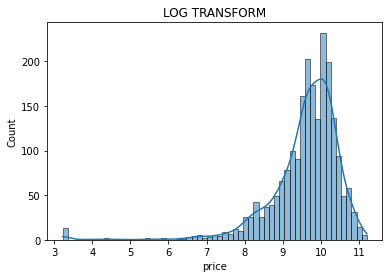

In [12]:
# WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
sns.histplot(x=np.sqrt(data['price']), kde=True);
plt.title('SQRT TRANSFORM');
plt.show()
print(np.log(data['price']).skew())
sns.histplot(np.log(data['price']), kde=True);
plt.title('LOG TRANSFORM');
plt.show()

<AxesSubplot:ylabel='Count'>

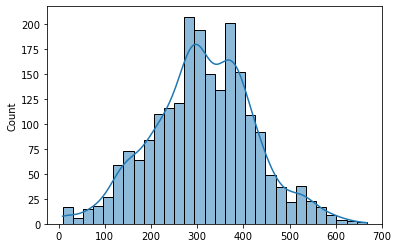

In [13]:
#trying box-cox transformation
from scipy import stats
price_boxcox = stats.boxcox(data['price'])[0]
pd.Series(price_boxcox).skew()
sns.histplot(price_boxcox, kde = True)

Clearly SQRT Transform is Better

In [14]:
# WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']), 2)

In [15]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(data.drop('price',axis = 1), data['price'], 
                                                    test_size = 0.2, random_state = 1)

In [16]:
# LET US PRINT THE SHAPES
# Start Code
print(X_train.shape) # Shape of X_train
print(X_test.shape) # Shape of X_test
print(y_train.shape) # Shape of y_train
print(y_test.shape) # Shape of y_test
# End Code


print('\nExpected shapes')
print((1722, 19))
print((431, 19))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 19)
(431, 19)
(1722,)
(431,)

Expected shapes
(1722, 19)
(431, 19)
(1722,)
(431,)

Verify if they are matching


<!-- NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br> -->
### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS as Linreg
# Start code
Linreg = LinearRegression()
# End code


# FIT the model on the training data i.e. (X_train, y_train)
# Start Code
Linreg.fit(X_train, y_train)
# End Code


# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT
print("Linear Regression Training mean_square_error is " + str(mean_squared_error(np.square(y_train), np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_squared_error(np.square(y_test), np.square(Linreg.predict(X_test)))))


# WRITE CODE FOR MEAN ABSOLUTE ERROR
# Start code

print(f"Linear Regression Training mean_absolute_error is {mean_absolute_error(np.square(y_train), np.square(Linreg.predict(X_train)))}")
print(f"Linear Regression testing mean absolute error is {mean_absolute_error(np.square(y_test), np.square(Linreg.predict(X_test)))}")
# End code


print("\n")
print("The correct values are :")

print('Linear Regression Training mean_square_error is 90997459.24037895')
print('Linear Regression Testing mean_square_error is 93998879.06677727')
print('Linear Regression Training mean_absolute_error is 6864.98050501778')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training mean_square_error is 90997459.24037957
Linear Regression Testing mean_square_error is 93998879.06677808
Linear Regression Training mean_absolute_error is 6864.980505017775
Linear Regression testing mean absolute error is 6926.987292556891


The correct values are :
Linear Regression Training mean_square_error is 90997459.24037895
Linear Regression Testing mean_square_error is 93998879.06677727
Linear Regression Training mean_absolute_error is 6864.98050501778
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


### Now for CLASSIFICATION models, we need to convert the target variable into different classes

In [22]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

<!-- WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000 -->
##### We will do Binary Classification (i.e. Classify into 2 classes) and divide the data equally (ALMOST) into 1's and 0's <br>
##### We have chosen threshold at PRICE = 20000

In [23]:
data.loc[np.square(data['price']) < 20000, 'price'] = 0
data.loc[np.square(data['price']) >= 20000, 'price'] = 1

In [24]:
# VIEWING THE DATA ONCE
# Start code
data.head()
# End code

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,0.0,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1.0,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1.0,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price',axis = 1), data['price'], 
                                                    test_size = 0.2,random_state = 1)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Write Code here and find the Accuracy for LOGISTIC REGRESSION

In [28]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, random_state as 1 
# START CODE
Logreg = LogisticRegression(max_iter = 2000, random_state = 1, solver = 'lbfgs')
# END CODE

 
# FIT Logistic Regression ON TRAINING DATA i.e. (X_train, y_train)
# START CODE
Logreg.fit(X_train, y_train)
# END CODE


# Find the Training and Testing Error using the accuracy_score function imported above
# START CODE
print(f"Logistic Regression Training accuracy score is {accuracy_score(y_train, Logreg.predict(X_train))}")
print(f"Logistic Regression Testing Accuracy Score is {accuracy_score(y_test, Logreg.predict(X_test))}")
# END CODE


print("\n")
print("The correct values are :")

print("Logistic Regression Training Accuracy 0.7264808362369338")
print("Logistic Regression Testing Accuracy 0.7192575406032483")

print("\nPlease verify if you have got the same values")

Logistic Regression Training accuracy score is 0.7264808362369338
Logistic Regression Testing Accuracy Score is 0.7192575406032483


The correct values are :
Logistic Regression Training Accuracy 0.7264808362369338
Logistic Regression Testing Accuracy 0.7192575406032483

Please verify if you have got the same values
